In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox
import warnings

warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('heart_diagnose.csv')
df.head()

,age,sex,pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,thal,heart disease
0,70,1.0,four,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,normal,1
1,67,0.0,three,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,reversable defect,0
2,57,1.0,two,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,reversable defect,1
3,64,1.0,four,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,reversable defect,0
4,74,0.0,two,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,normal,0


In [15]:
def print_skewness(skewness):
    if skewness > 0:
        print("The dataset is positively skewed.")
    elif skewness < 0:
        print("The dataset is negatively skewed.")
    else:
        print("The dataset is symmetric.")

    # Display the numerical value of the skewness
    print("The numerical value of the skewness is:", skewness)    

# Question1
Draw the histogram of resting blood pressure and determine if it is skewed. What kind is it? Display its numerical value

The dataset is positively skewed.
The numerical value of the skewness is: 0.7185972511657525


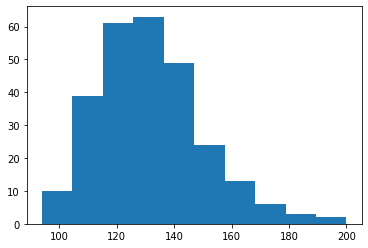

In [17]:
resting_blood_pressure = df['resting blood pressure']
plt.hist(resting_blood_pressure)
# Determine if the dataset is skewed
skewness = skew(resting_blood_pressure)
print_skewness(skewness)

# Question2
Try to fix the skewness with the help of natural logarithm. Store the normalized feature in a new variable and display its histogram and numerical value of skewness

The dataset is positively skewed.
The numerical value of the skewness is: 0.28747496517610605


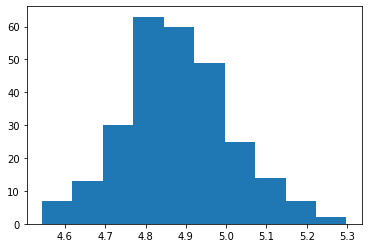

In [18]:
# Apply the natural logarithm to fix the skewness
resting_blood_pressure_log = np.log(resting_blood_pressure)

# Draw the histogram of the normalized feature
plt.hist(resting_blood_pressure_log)

# Determine if the dataset is skewed
skewness = skew(resting_blood_pressure_log)
print_skewness(skewness)

# Question3
Try to fix the skew by taking the square root. Store the normalized feature in a new variable and display its histogram and numerical value of skewness

The dataset is positively skewed.
The numerical value of the skewness is: 0.4979970346860892


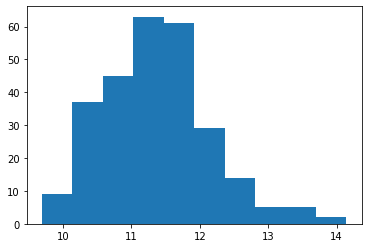

In [19]:
# Apply the square root to fix the skewness
resting_blood_pressure_sqrt = np.sqrt(resting_blood_pressure)

# Draw the histogram of the normalized feature
plt.hist(resting_blood_pressure_sqrt)

# Determine if the dataset is skewed
skewness = skew(resting_blood_pressure_sqrt)
print_skewness(skewness)

## Question 4
Find a new way to fix the skew and use it to fix the skew. Store the normalized feature in a new variable and display its histogram and numerical value of skewness

The dataset is positively skewed.
The numerical value of the skewness is: 0.0007434696494855163


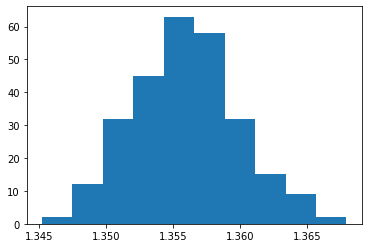

In [20]:
# Apply Box-Cox transform to fix the skewness
resting_blood_pressure_boxcox, _ = boxcox(resting_blood_pressure)

# Draw the histogram of the normalized feature
plt.hist(resting_blood_pressure_boxcox)
skewness = skew(resting_blood_pressure_boxcox)
print_skewness(skewness)

## Question 5
Compare the 3 methods

Original data: mean=131.34, std=17.83, skewness=0.72
Log transformed data: mean=4.87, std=0.13, skewness=0.29
Square root transformed data: mean=11.43, std=0.77, skewness=0.50
Box-Cox transformed data: mean=1.36, std=0.00, skewness=0.00


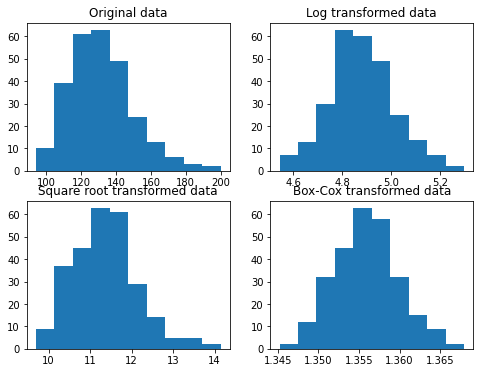

In [26]:
# Print summary statistics
print("Original data: mean=%.2f, std=%.2f, skewness=%.2f" % (
    np.mean(resting_blood_pressure), np.std(resting_blood_pressure), stats.skew(resting_blood_pressure)))
print("Log transformed data: mean=%.2f, std=%.2f, skewness=%.2f" % (
    np.mean(resting_blood_pressure_log), np.std(resting_blood_pressure_log), stats.skew(resting_blood_pressure_log)))
print("Square root transformed data: mean=%.2f, std=%.2f, skewness=%.2f" % (
    np.mean(resting_blood_pressure_sqrt), np.std(resting_blood_pressure_sqrt), stats.skew(resting_blood_pressure_sqrt)))
print("Box-Cox transformed data: mean=%.2f, std=%.2f, skewness=%.2f" % (
    np.mean(resting_blood_pressure_boxcox), np.std(resting_blood_pressure_boxcox), stats.skew(resting_blood_pressure_boxcox)))

# Plot histograms for comparison
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs[0, 0].hist(resting_blood_pressure)
axs[0, 0].set_title("Original data")
axs[0, 1].hist(resting_blood_pressure_log)
axs[0, 1].set_title("Log transformed data")
axs[1, 0].hist(resting_blood_pressure_sqrt)
axs[1, 0].set_title("Square root transformed data")
axs[1, 1].hist(resting_blood_pressure_boxcox)
axs[1, 1].set_title("Box-Cox transformed data")
plt.show()


We can see that all three transformations have reduced the skewness of the data to some extent, with the Box-Cox transformation achieving the greatest reduction in skewness. The means and standard deviations of the transformed data are also different from those of the original data.

The histograms show that the Box-Cox transformation has compressed the range of the data the most and it has shifted the data towards zero and made it more symmetric. 